##Step 1: Import Libraries

In [ ]:
#Load in necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Step 2: Load in the Dataset

In [ ]:
#Load in dataset
df_mortgage = pd.read_csv('mortgage_covenant_data.csv')
df_mortgage.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


##Step 3: Explore the Data

In [ ]:
#Show dataframe information
df_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

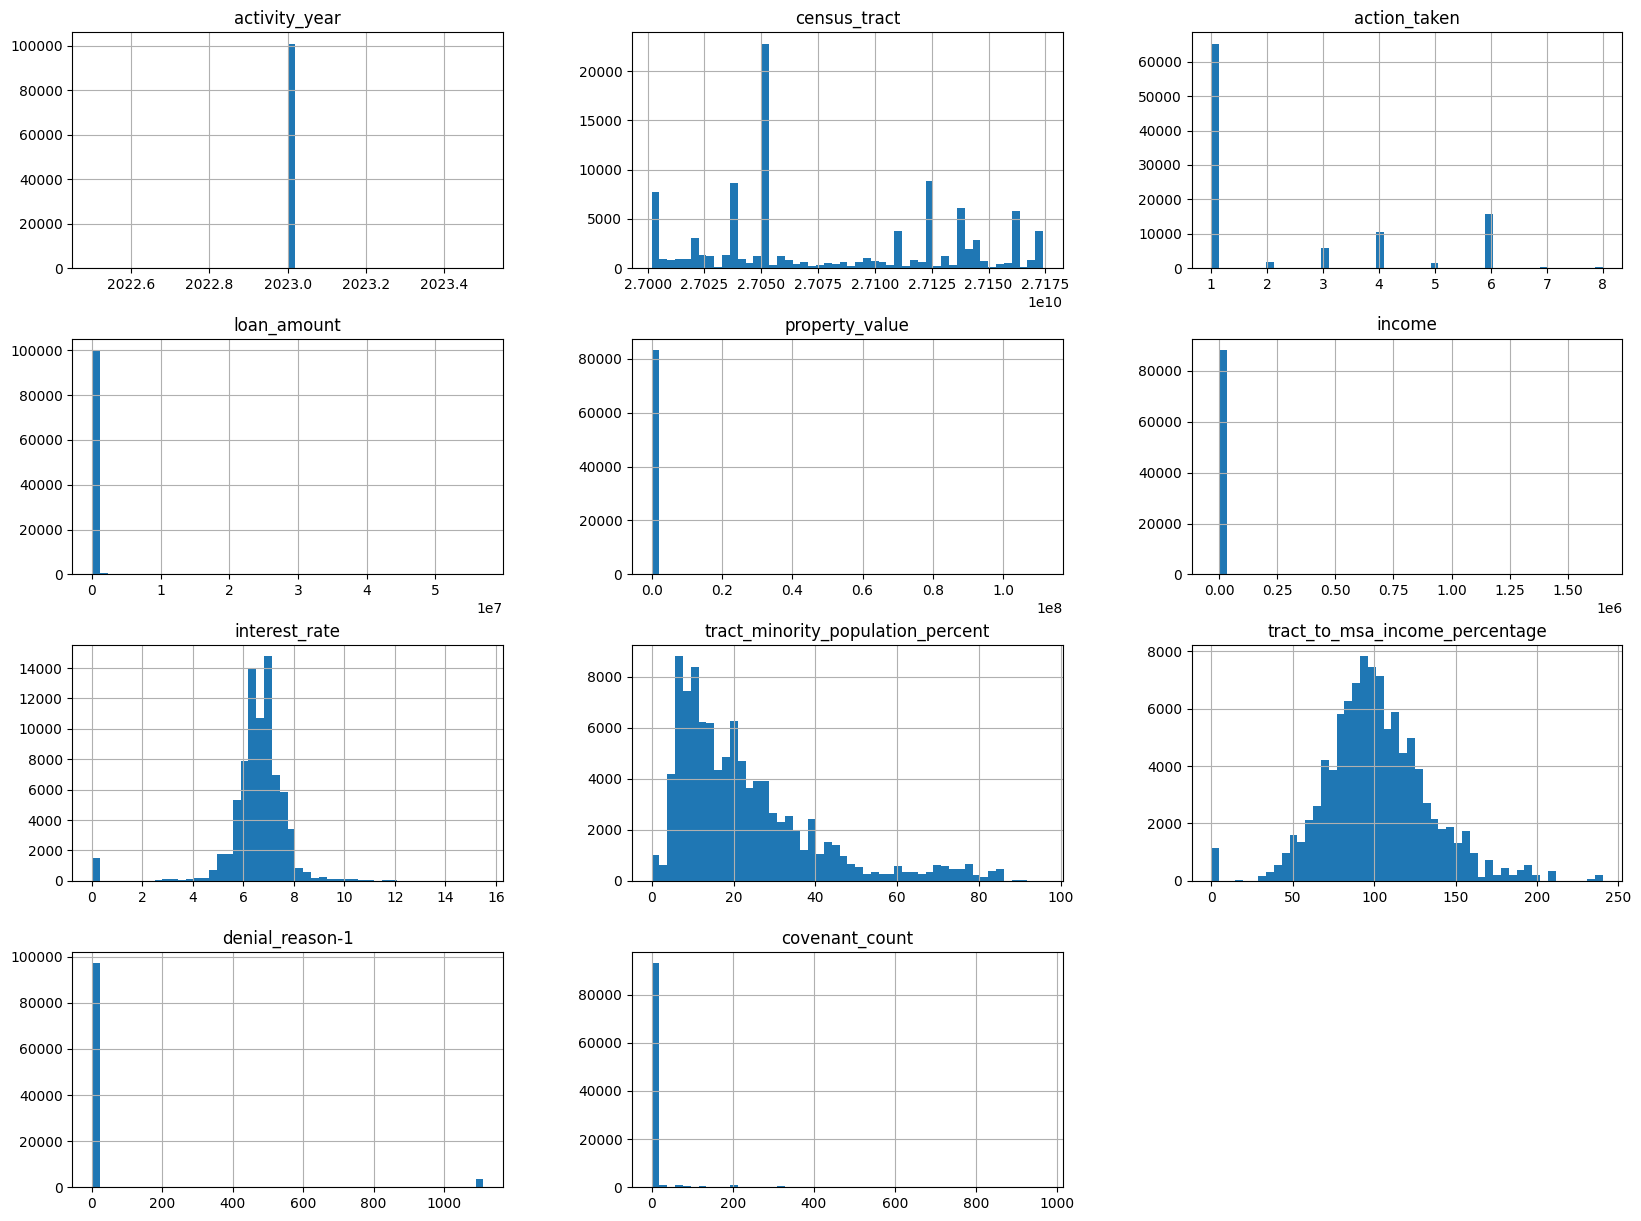

In [ ]:
#Show histogram of every numerical variable
df_mortgage.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Show statistical summary of every numerical variable
df_mortgage.describe()

,activity_year,census_tract,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count
count,100931.0,9.991500e+04,100931.000000,1.009310e+05,8.349100e+04,8.820000e+04,78125.000000,100931.000000,100931.000000,100931.000000,100931.000000
mean,2023.0,2.708025e+10,2.309528,3.110060e+05,3.987726e+05,1.489660e+02,6.575084,22.874029,101.813583,48.624763,17.408101
std,0.0,5.254319e+07,1.950185,7.617088e+05,1.197102e+06,5.568826e+03,1.273054,17.292952,32.381060,203.617075,84.973673
min,2023.0,2.700177e+10,1.000000,5.000000e+03,5.000000e+03,-3.415700e+04,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2023.0,2.703706e+10,1.000000,1.750000e+05,2.350000e+05,6.700000e+01,6.125000,10.140000,82.070000,10.000000,0.000000
50%,2023.0,2.705311e+10,1.000000,2.650000e+05,3.250000e+05,9.600000e+01,6.625000,18.640000,99.060000,10.000000,0.000000
75%,2023.0,2.712304e+10,4.000000,3.650000e+05,4.350000e+05,1.460000e+02,7.125000,29.710000,119.950000,10.000000,0.000000
max,2023.0,2.717397e+10,8.000000,5.700500e+07,1.113250e+08,1.651000e+06,15.500000,95.630000,240.430000,1111.000000,965.000000


Here is an overview of each variable:

activity_year: This variable is useless, as every observation has the same value, 2023.

census_tract: This is the ID variable for each census tract, so it should be converted to an object variable.

action_taken: Each possible value (1-8) corresponds to a specific outcome of each mortgage. This should be a categorical variable.

loan_amount: This variable is extremely right-skewed, which makes sense considering that most loans are relatively small, with a few large loan outliers.

property_value: Just like loan_amount, this variable is extremely right-skewed. Perhaps the two variables are correlated.

income: Again, this variable is extremely right-skewed. Judging on the patterns from the previous two variables, it is safe to assume that loan_amount, property_value, and income are all positively correlated with each other.

interest_rate: This variable is centered at 6.58% and not skewed in any one direction, but there is a noticeable presence of zero values, representing the mortgages with no interest rate.

tract_minority_population_percent: This variable is right-skewed, with a mean of 22.9% and a median of 18.6%.

tract_to_msa_income_percentage: This variable, by definition, is centered at 100 and Normally distributed, but the presence of 0 values once again shows up.

denial_reason-1: This variable should be a categorical variable.

covenant_count: This variable is extremely right-skewed, with the majority of values at 0. This suggests that the vast majority of mortgages in this area are executed without a covenant.

In [ ]:
#Change variables to categorical
df_mortgage = df_mortgage.drop(columns=['activity_year'], axis=1)
df_mortgage['census_tract'] = df_mortgage['census_tract'].astype('object')
df_mortgage['action_taken'] = df_mortgage['action_taken'].astype('object')
df_mortgage['denial_reason-1'] = df_mortgage['denial_reason-1'].astype('object')

In [ ]:
#Show value counts of each categorical variable
df_mortgage_object = df_mortgage.select_dtypes(include=['object'])
for col in df_mortgage_object.columns:
    print(col)
    print(df_mortgage_object[col].value_counts())
    print('\n')

census_tract
census_tract
2.705303e+10    606
2.716307e+10    580
2.705303e+10    432
2.705303e+10    420
2.717110e+10    384
               ... 
2.712304e+10      4
2.712303e+10      3
2.713700e+10      2
2.714501e+10      1
2.710900e+10      1
Name: count, Length: 1494, dtype: int64


derived_race
derived_race
White                                        63627
Race Not Available                           22811
Asian                                         5905
Black or African American                     5199
Joint                                         2427
American Indian or Alaska Native               709
2 or more minority races                       135
Native Hawaiian or Other Pacific Islander      113
Free Form Text Only                              5
Name: count, dtype: int64


action_taken
action_taken
1    65329
6    15687
4    10508
3     5796
2     1756
5     1320
8      375
7      160
Name: count, dtype: int64


denial_reason-1
denial_reason-1
10      91544
1111     35

##Step 4: Explore property_value Variable

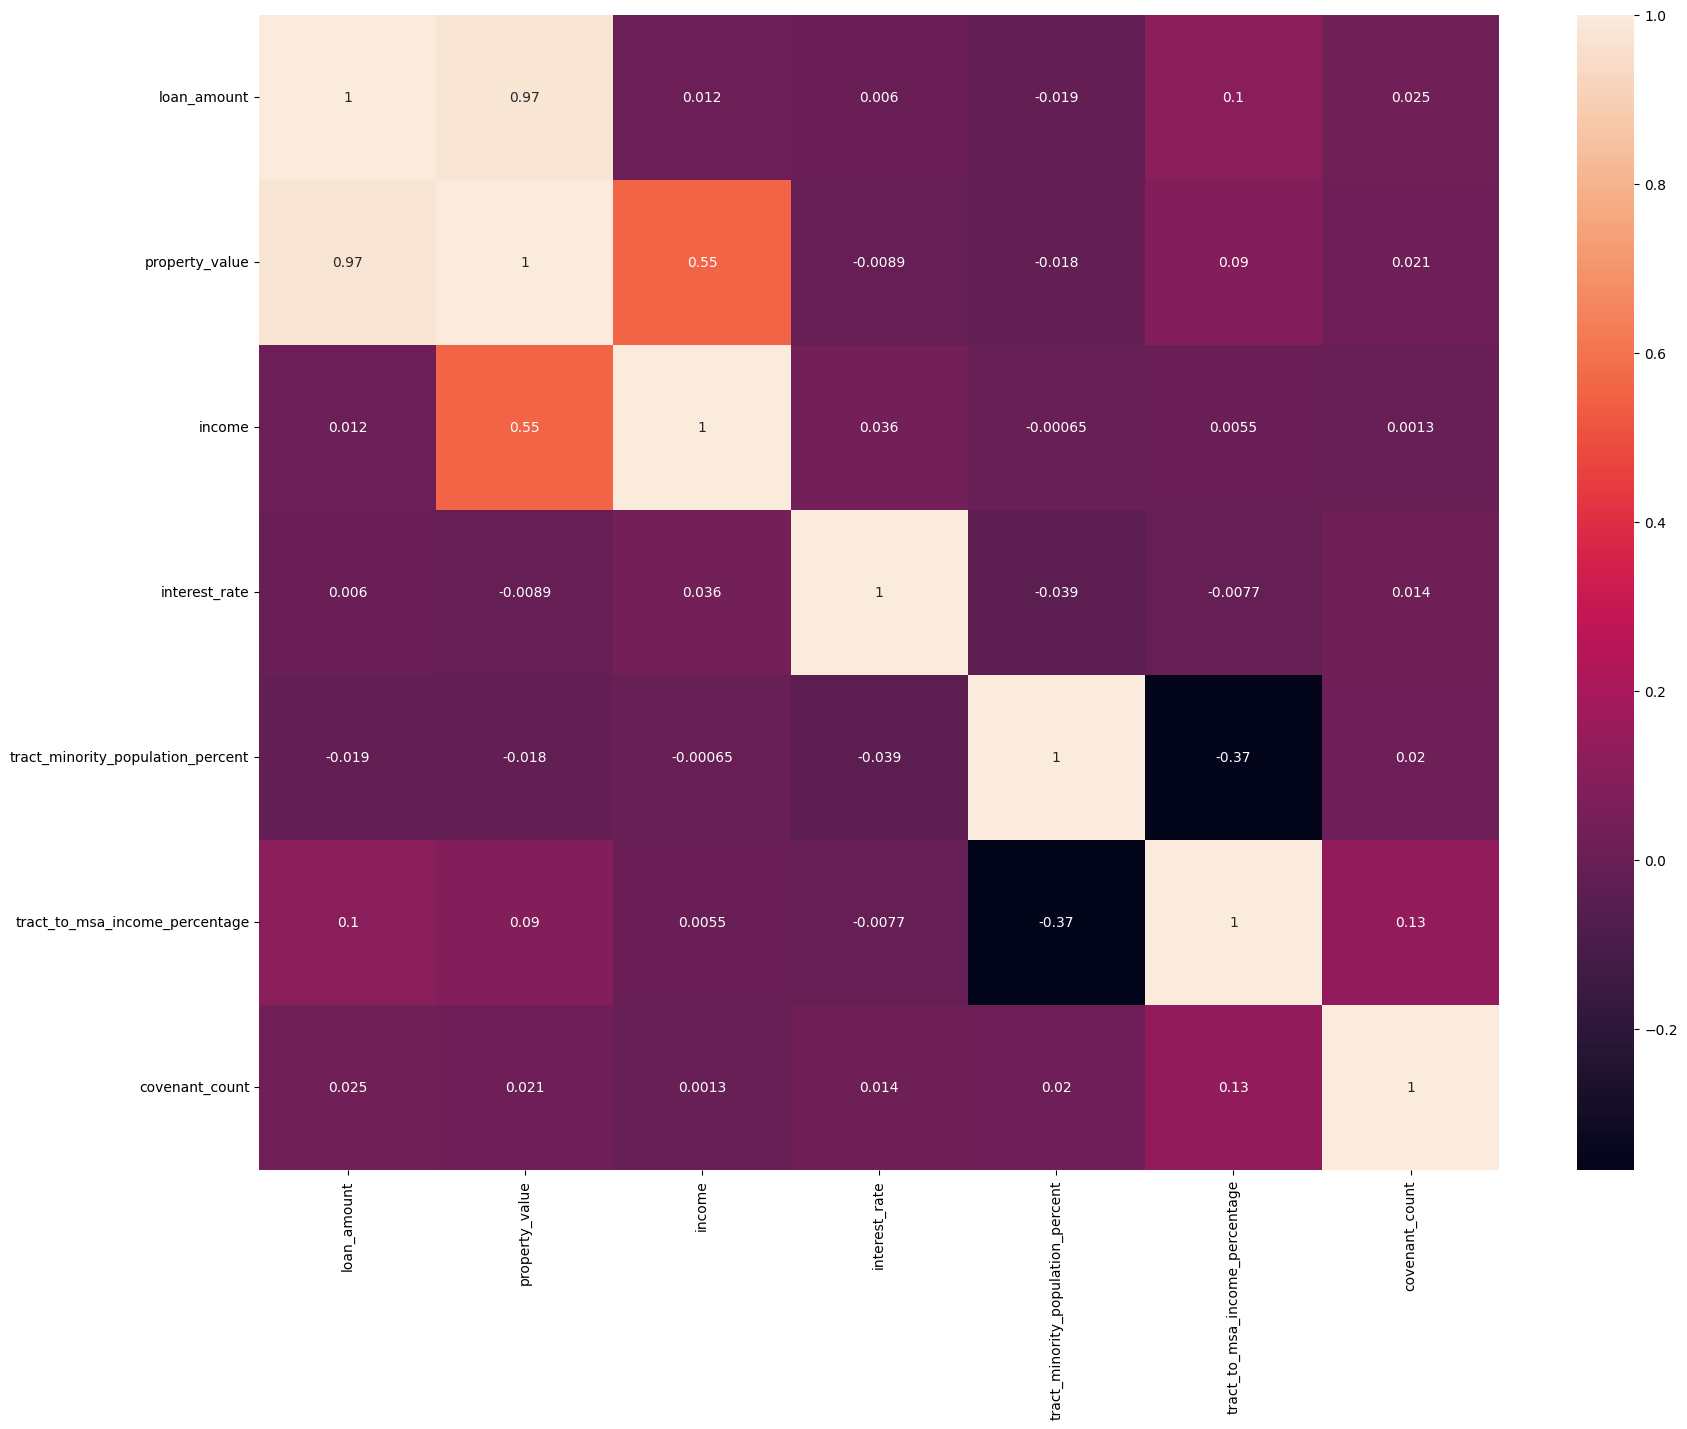

In [ ]:
#Show correlation heatmap of numerical variables
df_mortgage_numerical = df_mortgage.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20,15))
sns.heatmap(df_mortgage_numerical.corr(), annot=True)
plt.show()

As suspected, loan_amount and property_value are highly correlated to each other. The income variable is also strongly correlated with property_value, but not with loan_amount; this suggests that property value is a better predictor of mortgage loan amount than income. Also, there is a moderate negative correlation between tract_to_msa_income_percentage and tract_minority_population_percent. This means that census tracts with a higher proportion of minorities are generally more likely to have a low income compared to the MSA average.

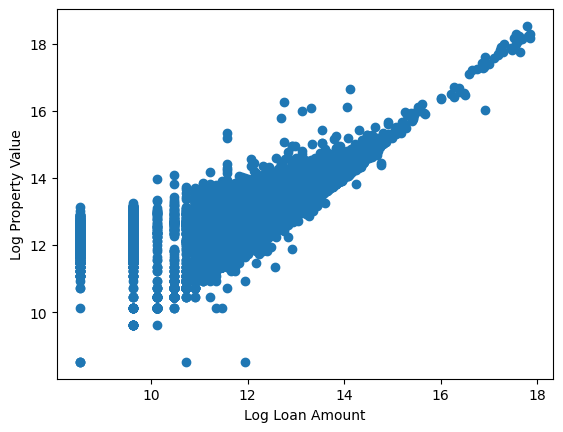

In [ ]:
#Show scatterplot between log property value and log loan amount
df_mortgage["log_property_value"] = np.log(df_mortgage["property_value"])
df_mortgage["log_loan_amount"] = np.log(df_mortgage["loan_amount"])
plt.scatter(df_mortgage['log_loan_amount'], df_mortgage['log_property_value'])
plt.ylabel('Log Property Value')
plt.xlabel('Log Loan Amount')
plt.show()

When taking the log transformations of both variables, the correlation is revealed to be non-linear. The slope increases gradually as loan amount increases.

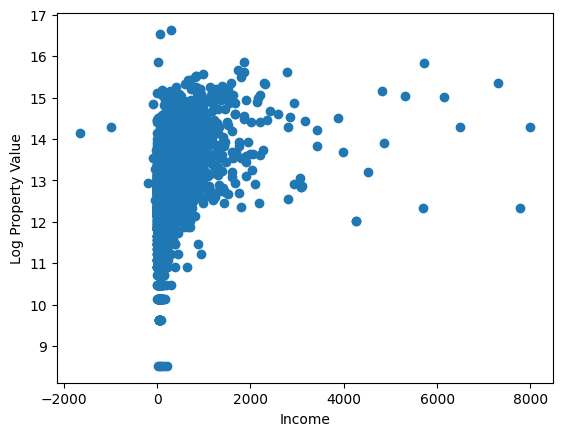

In [ ]:
#Show scatterplot between log property value and income (log transformation will not work with negative income)
plt.scatter(df_mortgage['income'], df_mortgage['log_property_value'])
plt.ylabel('Log Property Value')
plt.xlabel('Income')
plt.show()

When taking the log transformation of property value, the scatterplot appears to show a marginal positive correlation. When removing outliers, the correlation appears to be non-linear.

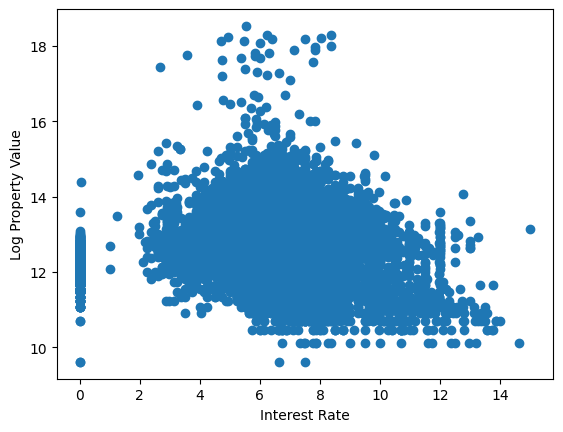

In [ ]:
#Show scatterplot between property value and interest rate
plt.scatter(df_mortgage['interest_rate'], df_mortgage['log_property_value'])
plt.ylabel('Log Property Value')
plt.xlabel('Interest Rate')
plt.show()

When removing the 0 values for interest rate, there appears to be a weak negative correlation between property value and interest rate (log transformations were used to make the relationships easier to see).

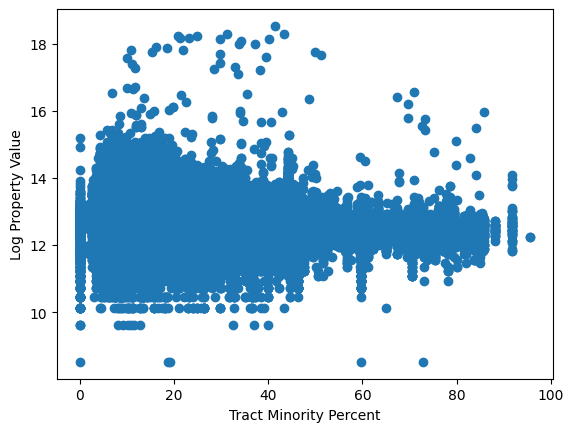

In [ ]:
#Show scatterplot between property value and minority percent
plt.scatter(df_mortgage['tract_minority_population_percent'], df_mortgage['log_property_value'])
plt.ylabel('Log Property Value')
plt.xlabel('Tract Minority Percent')
plt.show()

While there does not appear to be a correlation between minority percent and property value, the variance in property value appears to shrink as the proportion of census tract minorities increases.

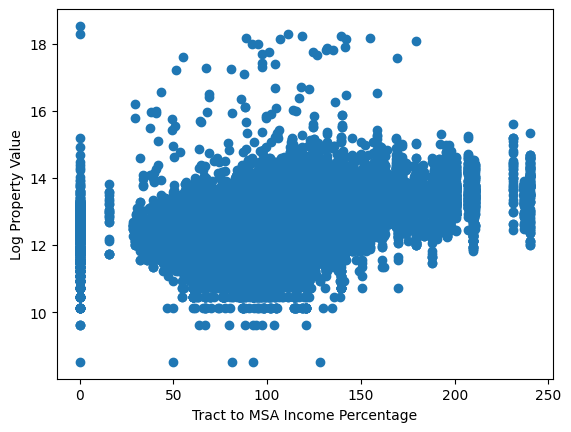

In [ ]:
#Show scatterplot between property value and tract to MSA income percentage
plt.scatter(df_mortgage['tract_to_msa_income_percentage'], df_mortgage['log_property_value'])
plt.ylabel('Log Property Value')
plt.xlabel('Tract to MSA Income Percentage')
plt.show()

There appears to be a very weak correlation between tract to MSA income percentage and property value (only after removing 0 values).

In [ ]:
#Replace NAs with "None" in covenant_density variable
df_mortgage['covenant_density'] = df_mortgage['covenant_density'].fillna('None')
df_mortgage['covenant_density'].value_counts()

,count
covenant_density,
None,89762
Low (1-50),4537
Very High (>200),3140
Medium (51-100),1772
High (101-200),1720


<ipython-input-15-ffa2359f02e9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_values = df_mortgage.groupby("covenant_density")["property_value"].mean()


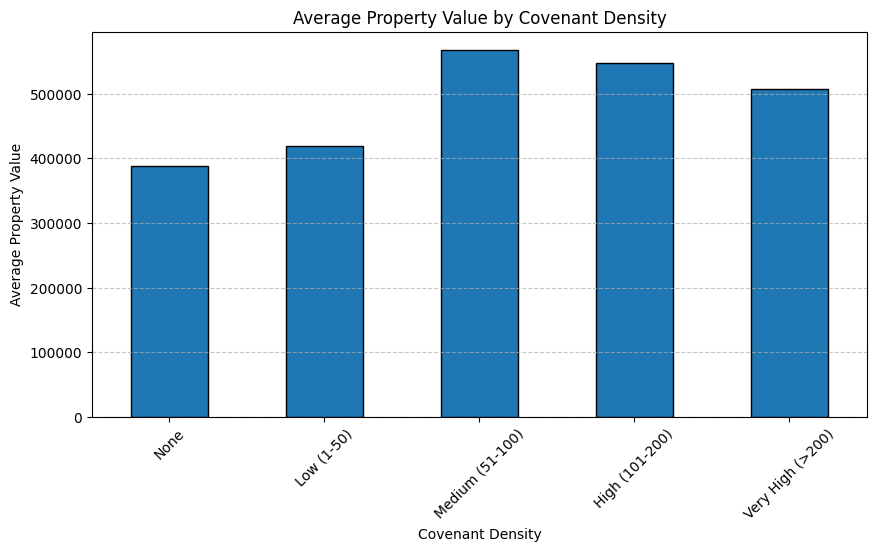

In [ ]:
#Compute the average property_value per category in covenant_density

custom_order = ["None", "Low (1-50)", "Medium (51-100)", "High (101-200)", "Very High (>200)"]
df_mortgage["covenant_density"] = pd.Categorical(df_mortgage["covenant_density"], categories=custom_order, ordered=True)
avg_values = df_mortgage.groupby("covenant_density")["property_value"].mean()

#Plot the bar chart
plt.figure(figsize=(10, 5))
avg_values.plot(kind="bar", edgecolor="black")
plt.xlabel("Covenant Density")
plt.ylabel("Average Property Value")
plt.title("Average Property Value by Covenant Density")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Show the plot
plt.show()

There appears to be a significant difference in average property value between levels of covenant density. Mortgages with no covenants or a low density of covenants have the lowest property values, but the highest average property value is not associated with the Very High category; it is associated with the Medium category. This means that there is a "sweet spot" when comparing covenant density to property value; mortgages with too many covenants may not always be associated with high property values.

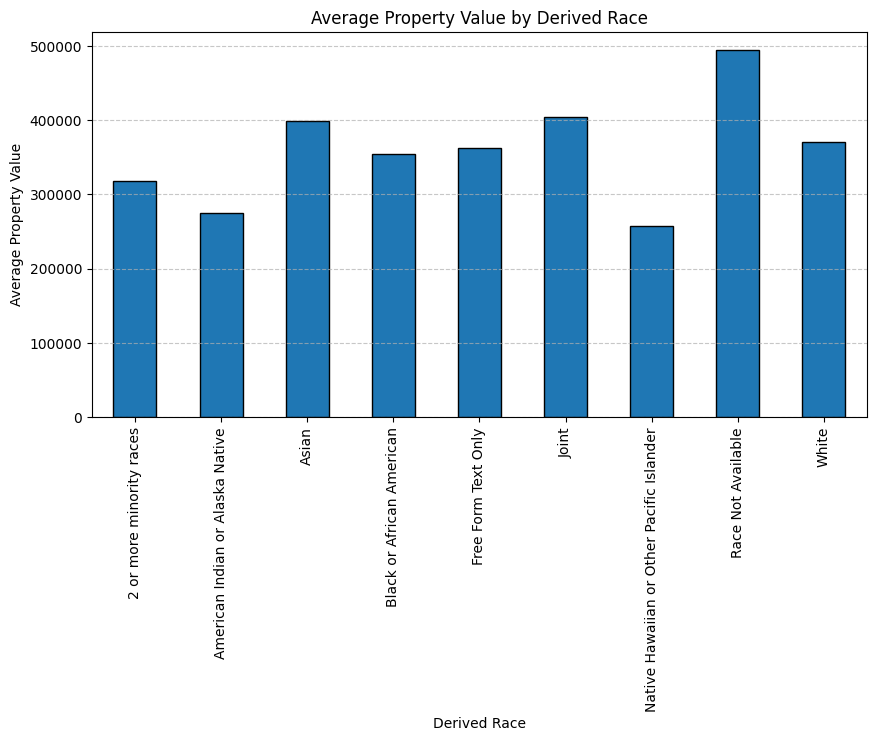

In [ ]:
avg_values = df_mortgage.groupby("derived_race")["property_value"].mean()

#Plot the bar chart
plt.figure(figsize=(10, 5))
avg_values.plot(kind="bar", edgecolor="black")
plt.xlabel("Derived Race")
plt.ylabel("Average Property Value")
plt.title("Average Property Value by Derived Race")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Show the plot
plt.show()

When comparing the average property value by race, one interesting observation can be made: the mortgages without a listed race have a significantly higher property value than all other races. This is not a result of small sample size, since the Race Not Available category is the second largest category. It is entirely possible that this could be due to data bias, as the system could be intentionally removing race from mortgages with high property values, with the intention of masking discrepancies between white homeowners and historically oppressed minorities. If each mortgage's race was known, it is reasonable to conclude that this graph would give a very different conclusion.

Here are the main takeaways from exploring property value patterns:

* Property value is extremely highly correlated with loan amount.

* There is a weak non-linear positive correlation between property value and income.

* There is a weak non-linear negative correlation between property value and interest rate.

* The variance of property value shrinks as the proportion of minorities in a census tract increases. This may be evidence of mortgages with high property values containing remnants of racial covenants, indicating segregation in the metropolitan area.

* There is a non-linear relationship between covenant density and property value, with a "sweet spot" at the Medium category (51-100 covenants). Mortgages with no covenants have the lowest average property value.

* The Race Not Available category, which is the second most common category, has the highest average property value. This is definitely suspicious and should be looked into further.

##Step 5: Explore loan_amount Variable

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


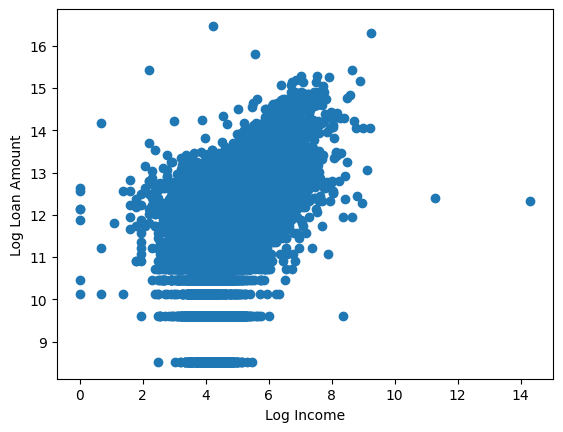

In [ ]:
#Show scatterplot between log loan amount and log income
df_mortgage["log_income"] = np.log(df_mortgage["income"])
plt.scatter(df_mortgage['log_income'], df_mortgage['log_loan_amount'])
plt.ylabel('Log Loan Amount')
plt.xlabel('Log Income')
plt.show()

There appears to be a weak positive correlation between income and loan amount.

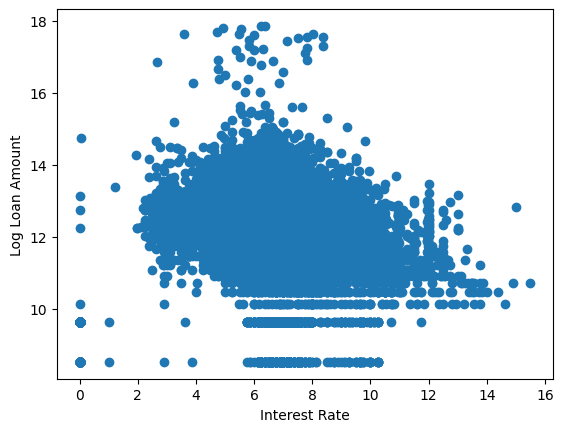

In [ ]:
#Show scatterplot between loan amount and interest rate
plt.scatter(df_mortgage['interest_rate'], df_mortgage['log_loan_amount'])
plt.ylabel('Log Loan Amount')
plt.xlabel('Interest Rate')
plt.show()

The relationship between interest rate and loan amount is almost exactly the same as the relationship between interest rate and property value.

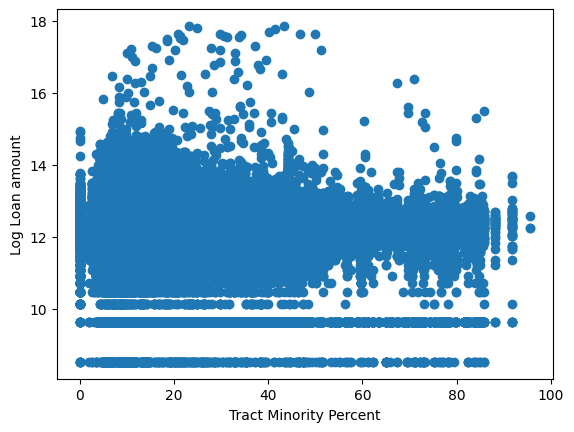

In [ ]:
#Show scatterplot between loan amount and minority percent
plt.scatter(df_mortgage['tract_minority_population_percent'], df_mortgage['log_loan_amount'])
plt.ylabel('Log Loan amount')
plt.xlabel('Tract Minority Percent')
plt.show()

There is a negative non-linear correlation between tract minority percentage and loan amount.

In [ ]:
#Create dataframe only containing census tracts with over 50% minority population
df_mortgage_minority = df_mortgage[df_mortgage['tract_minority_population_percent'] > 50]
minority_max = max(df_mortgage_minority["loan_amount"])
print(minority_max)
df_mortgage_nonminority = df_mortgage[df_mortgage['tract_minority_population_percent'] <= 50]
print(len(df_mortgage_nonminority[df_mortgage_nonminority["loan_amount"] > minority_max]))

29025000.0
23


The maximum loan amount for mortgages in census tracts with over 50% of the population being minorities is $29,025,000. In census tracts with less than or equal to 50% of the population being minorities, there are 23 mortgages with a higher loan amount. This is evidence of wealth disparity between census tracts with differing proportions of minorities.

<ipython-input-21-6fc514bc8f8c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_values = df_mortgage.groupby("covenant_density")["loan_amount"].mean()


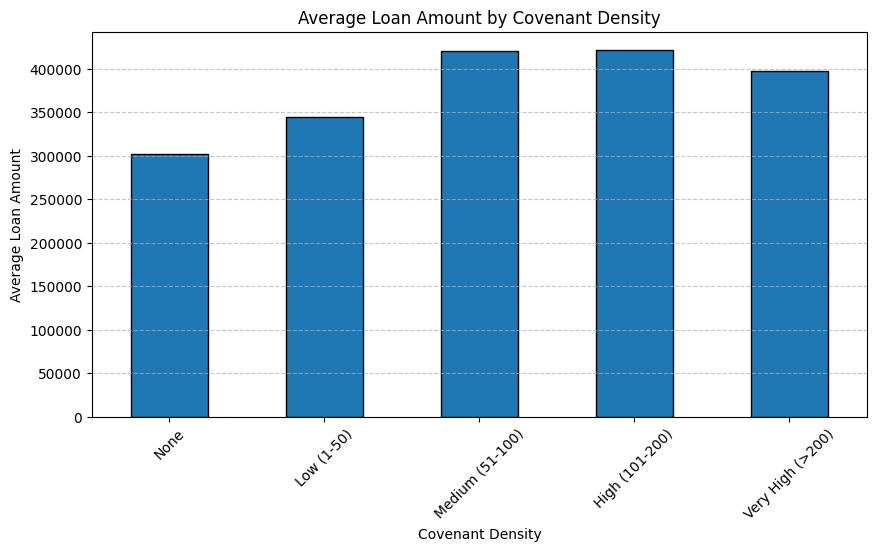

In [ ]:
#Compute the average loan_amount per category in covenant_density

avg_values = df_mortgage.groupby("covenant_density")["loan_amount"].mean()

#Plot the bar chart
plt.figure(figsize=(10, 5))
avg_values.plot(kind="bar", edgecolor="black")
plt.xlabel("Covenant Density")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Covenant Density")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Show the plot
plt.show()

The patterns in loan amount by covenant density category are the exact same as in property value by covenant density. This should not be surprising since the variables are highly correlated to each other.

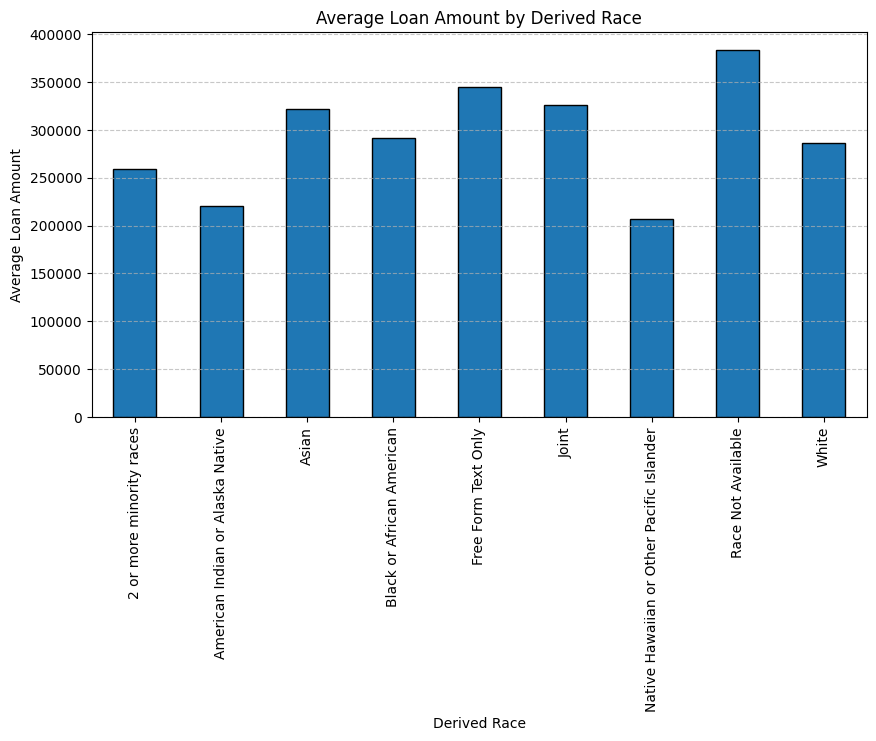

In [ ]:
avg_values = df_mortgage.groupby("derived_race")["loan_amount"].mean()

#Plot the bar chart
plt.figure(figsize=(10, 5))
avg_values.plot(kind="bar", edgecolor="black")
plt.xlabel("Derived Race")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Derived Race")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#Show the plot
plt.show()

The Derived Race barplot with average loan amount gives the same conclusion as the barplot with property value. This shows that the "Race Not Available" issue exists for multiple metrics that measure wealth.

##Step 6: Get Ramsey County Data

In [ ]:
import geopandas as gpd
from shapely.geometry import Point


# Read the full state file
mn_tracts = gpd.read_file('tl_2024_27_tract.zip')

# Filter for Ramsey County (FIPS code 053)
ramsey_tracts = mn_tracts[mn_tracts['COUNTYFP'] == '123']

# Save just Ramsey County if you want
ramsey_tracts.to_file('ramsey_tracts.shp')

In [ ]:
mortgage_data = pd.read_csv('state_MN.csv')
mheaders = mortgage_data.columns
mheaders

<ipython-input-24-fa3d80490ffe>:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,44) have mixed types. Specify dtype option on import or set low_memory=False.
  mortgage_data = pd.read_csv('state_MN.csv')


Index(['activity_year', 'lei', 'derived_msa-md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'rate_spread',
       'hoepa_status', 'total_loan_costs', 'total_points_and_fees',
       'origination_charges', 'discount_points', 'lender_credits', 'loan_term',
       'prepayment_penalty_term', 'intro_rate_period', 'negative_amortization',
       'interest_only_payment', 'balloon_payment',
       'other_nonamortizing_features', 'property_value', 'construction_method',
       'occupancy_type', 'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_

In [ ]:
# filter by loan_purpose = 1 (home purchase)
mortgage_data = mortgage_data[mortgage_data['loan_purpose'] == 1]

In [ ]:
covenent = pd.read_csv('covenants-mn-ramsey-county.csv')
cheaders = covenent.columns
cheaders

Index(['db_id', 'workflow', 'cnty_name', 'cnty_fips', 'doc_num', 'deed_year',
       'deed_date', 'exec_date', 'cov_text', 'seller', 'buyer', 'street_add',
       'city', 'state', 'zip_code', 'add_cov', 'block_cov', 'lot_cov',
       'cnty_pin', 'add_mod', 'block_mod', 'lot_mod', 'ph_dsc_mod',
       'join_strgs', 'geocd_addr', 'geocd_dist', 'cov_type', 'match_type',
       'manual_cx', 'dt_updated', 'zn_subj_id', 'zn_dt_ret', 'image_ids',
       'med_score', 'plat_dbid', 'subd_dbid'],
      dtype='object')